In [122]:
import pandas as pd
import numpy as np
import sklearn as sk
import os, sys

# Test Case

In [123]:
os.listdir()

['.ipynb_checkpoints',
 '11803Official-List-of-Proposed-SDG-Indicators.pdf',
 '2019_macroeconomicOutlook-1.pdf',
 'Data extraction.ipynb',
 'data for agriculture.xlsx',
 'gdp contributors.xlsx',
 'GDP.xlsx',
 'NESG Data - Various Indicators - Draft 2.xlsx',
 'NESG Meeting 2-13th Friday 2019.docx',
 'NESG Meeting.docx',
 'NESG Model Worksheet.xlsx',
 'Nigeria SDGs Indicators Baseline Report 2016.pdf',
 'overall data processing.ipynb',
 'subsector.xlsx',
 'WEF_Forum_IncGrwth_2018.pdf',
 '~$GDP.xlsx',
 '~$NESG Data - Various Indicators - Draft 2.xlsx',
 '~$NESG Model Worksheet.xlsx',
 '~$SG Meeting 2-13th Friday 2019.docx',
 '~$SG Meeting.docx']

In [124]:
read_data = pd.read_excel('NESG Model Worksheet.xlsx')

In [125]:
read_data.head()

,Indicator,Industry Services,Road Transport,Rail Transport & Pipelines,Water Transport,Air Transport,Transport Services,Post and Courier Services,Oil Refining,Cement,...,Cereal production (metric tons),Cereal yield (kg per hectare),Domestic credit provided by financial sector (% of GDP),Domestic credit to private sector (% of GDP),"Employers, female (% of female employment) (modeled ILO estimate)","Employers, male (% of male employment) (modeled ILO estimate)","Employers, total (% of total employment) (modeled ILO estimate)",Employment in industry (% of total employment) (modeled ILO estimate),"Employment in industry, female (% of female employment) (modeled ILO estimate)","Employment in industry, male (% of male employment) (modeled ILO estimate)"
0,1981,7473.205379,0.040977,0.001745,0.001060,0.003442,0.000826,0.000750,0.004894,0.025550,...,8053000.0,1655.5,30.505034,15.624628,NaN,NaN,NaN,NaN,NaN,NaN
1,1982,6969.202777,0.030074,0.001818,0.000834,0.003799,0.000808,0.000572,0.005523,0.032119,...,8468000.0,1632.9,40.117632,17.918166,NaN,NaN,NaN,NaN,NaN,NaN
2,1983,5885.926785,0.023807,0.001657,0.001298,0.004055,0.000765,0.000521,0.004734,0.013468,...,8828000.0,1526.0,47.802308,17.004205,NaN,NaN,NaN,NaN,NaN,NaN
3,1984,6128.635554,0.023851,0.001762,0.000900,0.004123,0.000651,0.000559,0.004476,0.008135,...,10503000.0,1266.3,47.368776,16.155901,NaN,NaN,NaN,NaN,NaN,NaN
4,1985,6731.368220,0.029776,0.001257,0.000745,0.004131,0.000607,0.000554,0.005805,0.037032,...,11889000.0,1247.9,43.403757,15.425875,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
read_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 71 columns):
Indicator                                                                              38 non-null int64
Industry Services                                                                      38 non-null float64
           Road Transport                                                              38 non-null float64
           Rail Transport & Pipelines                                                  38 non-null float64
           Water Transport                                                             38 non-null float64
           Air Transport                                                               38 non-null float64
           Transport Services                                                          38 non-null float64
           Post and Courier Services                                                   38 non-null float64
            Oil Refining                   

In [127]:
for k in read_data.columns:
    count = read_data[k].count()
    if count != 38:
        read_data[k].fillna(read_data[k].mean(), inplace = True)
    else:
        pass


In [128]:
industry = list(read_data.columns[:24])
industry.append('Households and NPISHs Final consumption expenditure (constant LCU)')
industry.append('Households and NPISHs Final consumption expenditure (current LCU)')

industry.append('Manufacturing, value added (constant LCU)')                   
industry.append('Manufacturing, value added (current LCU)')

industry.append('Net domestic credit (current LCU)')
industry.append('Cereal production (metric tons)')
industry.append('Cereal yield (kg per hectare)')


In [129]:
read_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 71 columns):
Indicator                                                                              38 non-null int64
Industry Services                                                                      38 non-null float64
           Road Transport                                                              38 non-null float64
           Rail Transport & Pipelines                                                  38 non-null float64
           Water Transport                                                             38 non-null float64
           Air Transport                                                               38 non-null float64
           Transport Services                                                          38 non-null float64
           Post and Courier Services                                                   38 non-null float64
            Oil Refining                   

In [130]:
import xlrd
workbook = xlrd.open_workbook('NESG Model Worksheet.xlsx')
GDP = workbook.sheet_by_name('GDP')

In [131]:
GDP.row_slice(rowx=0,start_colx=0,end_colx=10)

[text:'Activity Sector',
 text:'Agriculture',
 text:'Industry',
 text:'Construction',
 text:'Trade',
 text:'Services',
 text:'Total Real GDP']

In [132]:
gdp = []
for l in range(0,40):
    cell = GDP.cell(l,2)
    gdp.append(cell.value)
    

In [133]:
gdp = pd.read_excel('gdp contributors.xlsx')

In [134]:
gdp.head()

,Activity Sector,1. Agriculture,2. Industry,3. Construction,4. Trade,5. Services
0,1981,2364.373149,6603.250124,851.561607,1770.381465,3668.437998
1,1982,2425.960886,6272.828025,679.200416,1846.954231,3760.134757
2,1983,2409.081921,5264.881391,598.782267,1801.783241,3775.196354
3,1984,2303.505416,5621.181442,488.143285,1662.300574,3704.124778
4,1985,2731.062467,6379.599378,336.270794,1727.979399,3779.001008


In [135]:
gdp_k = gdp.drop('Activity Sector', axis = 1)

In [136]:
val = gdp_k.sum()

In [137]:
val

1. Agriculture      292353.914620
2. Industry         359874.342265
3.  Construction     39701.937346
4.  Trade           185232.585963
5. Services         404395.538023
dtype: float64

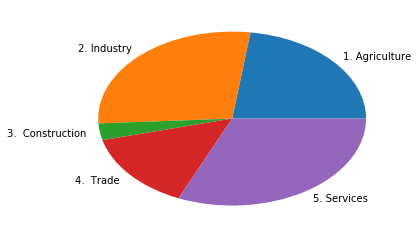

In [138]:
import matplotlib.pyplot as plt
plt.pie(val, labels = val.keys())
plt.show()

In [139]:
y_agriculture = gdp['2. Industry']

In [140]:
#for k in read_data.columns:
#    if '%' in k:
#        read_data = read_data.drop(k, axis = 1)
#    else:
#        pass
    
#read_data.info()

In [ ]:
["Federal Government Capital Expenditure  (₦' Billion)",'Final consumption expenditure (constant LCU)','Electric power consumption (kWh per capita)',
'Manufactures exports (% of merchandise exports)','Manufactures imports (% of merchandise imports)', ]

# Sub Sectorial contribution

In [66]:
sector = pd.read_excel('subsector.xlsx')

In [67]:
sector.head()

,(a) Crude Petroleum & Natural Gas,(b) Solid minerals,(c) Manufacturing,(b) Livestock,(c) Forestry,(d) Fishing,(a) Transport,(b) Information and Communication,(c) Utilities,(d) Accommodation and Food Services,(e) Finance & Insurance,(f) Real Estate,"(g) Professional, Scientific & Technical Serv.",(h) Administrative and Support Services Business Services,(i) Public Administration,(j) Education,(k) Human Health & Social Services,"(l) Arts, Entertainment & Recreation",(m) Other Services
0,4977.416702,67.136726,1558.696697,341.411498,77.897986,90.299226,264.512654,263.409449,18.393648,53.784583,282.170742,1063.959810,421.381976,3.234810,807.075543,242.555853,110.697654,4.561074,132.700202
1,4453.093633,54.840498,1764.893895,361.115702,73.910250,93.856084,211.891350,281.235378,17.174336,50.804261,372.267760,1074.049330,423.670540,3.252378,825.921692,248.219813,113.282573,4.597761,133.767584
2,4052.977679,44.014843,1167.888869,393.131013,75.282779,97.963819,178.322313,278.786501,22.263127,42.696032,336.896501,1086.703982,481.170729,3.693788,844.767841,253.883773,115.867491,4.324582,125.819694
3,4559.196209,43.078368,1018.906865,399.685385,76.694141,68.010739,170.279791,253.756738,19.310827,35.968394,267.287624,1086.931994,518.359905,3.979277,863.613989,259.547733,118.452410,3.543426,103.092670
4,4918.272497,44.539086,1416.787795,428.102848,78.082446,43.969459,203.571157,202.382955,15.498048,33.192604,254.993435,1091.378223,602.464658,4.624922,882.460138,265.211693,121.037328,3.395548,98.790300


In [77]:
sector.columns

Index(['  (a) Crude Petroleum & Natural Gas', '  (b) Solid minerals  ',
       '  (c) Manufacturing', '  (b) Livestock', '  (c) Forestry',
       '  (d) Fishing', '  (a) Transport',
       '  (b) Information and  Communication', '  (c) Utilities',
       '  (d) Accommodation and Food Services', '  (e) Finance & Insurance',
       '  (f)  Real Estate ',
       '  (g) Professional, Scientific & Technical Serv.       ',
       '  (h) Administrative and Support Services Business Services',
       '  (i)  Public Administration', '  (j)  Education',
       '  (k) Human Health & Social Services          ',
       '  (l)  Arts, Entertainment & Recreation', ' (m) Other Services'],
      dtype='object')

In [79]:
sector['overall sum'] = np.zeros(shape = (38,))
for k in sector.columns:
    sector['overall sum'] += sector[k]

In [89]:
sector = sector.drop('overall sum', axis = 1)

In [90]:
sum_sector = sector.sum()

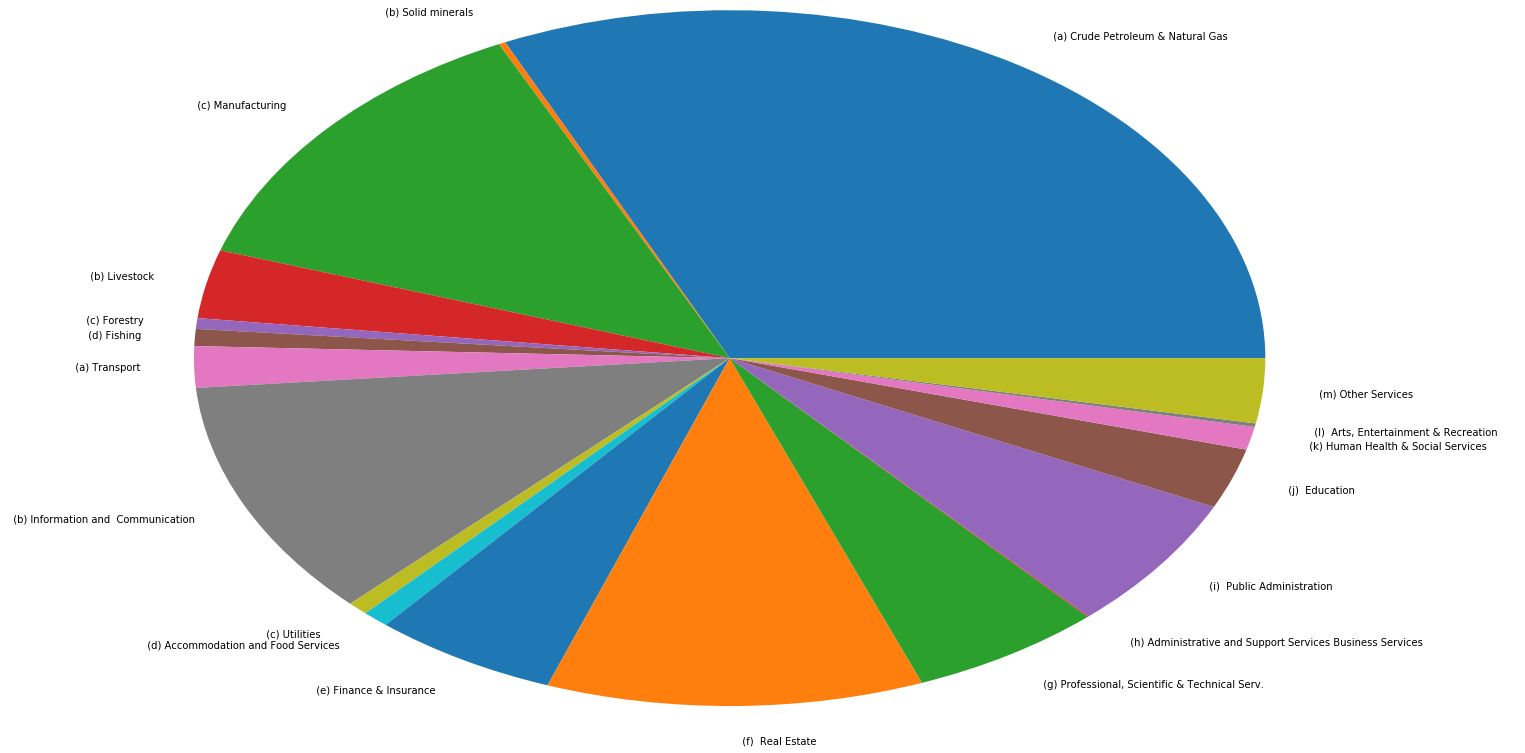

In [93]:
import matplotlib.pyplot as plt
plt.pie(sum_sector, labels = sum_sector.keys(), radius = 4)
plt.show()